In [11]:
import sys
sys.path.append("..")
from alphabet import load_alphabet
from alphabet import A
import numpy as np
import matplotlib.pyplot as plt
from synthetic import DataGenerator, SynthSettings
from noise import Noise
from unet import UNet
import torch
alphabet = load_alphabet()

In [3]:
elements_per_class = {cls: len(images) for cls, images in alphabet.items()}
classes = list(elements_per_class.keys())
classes.sort()
counts = list(elements_per_class.values())
print(counts)

[300, 300, 193, 300, 10, 300, 300, 300, 116, 294, 300, 300, 300, 300, 37, 78, 23, 300, 265, 91, 12, 300, 15, 300, 73, 300, 130]


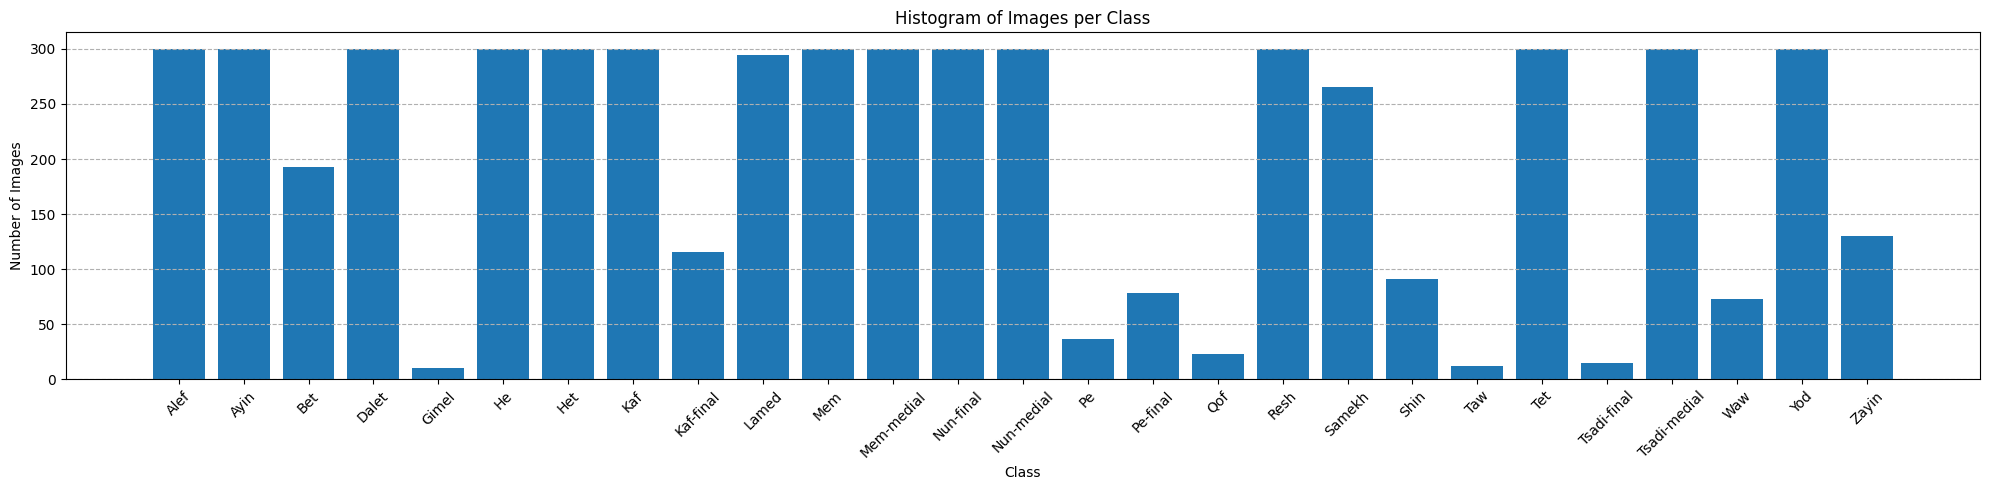

In [4]:
plt.figure(figsize=(20,5))
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [5]:

settings = SynthSettings(downscale_factor=0.3)
generator = DataGenerator(settings=settings)
tokens, masks, scrolls = generator.generate_ngram_scrolls(1000)

116


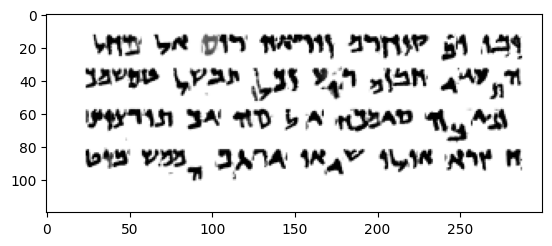

In [6]:
plt.imshow(scrolls[0], cmap="gray")
print((tokens[0] > -1).sum())

In [ ]:
noiser = Noise(image_size=generator.settings.image_size)
noiser.create_masks(5)

(400, 1000) (400, 1000) (400, 1000)


In [24]:
dmgd_scrolls = noiser.damage(images = scrolls, strength=0.2)

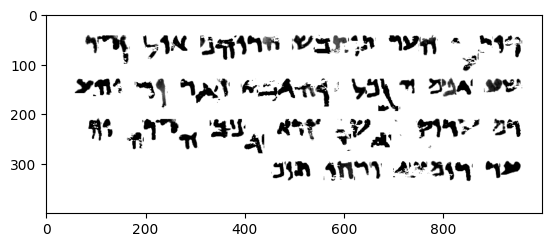

In [ ]:
plt.imshow(dmgd_scrolls[0], cmap="gray")

In [14]:
scrolls[0].shape
import os
print(os.getcwd())
model = UNet(num_classes=27)
model.load_state_dict(torch.load("checkpoints/unet_20250419_184954/best_model.pth"))
model.to("cuda")
model.eval()

/home/sebastian/mine/DeadSeaScrolls/seb


UNet(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.0

In [16]:
img = scrolls[0]  # This is a numpy array, shape: (H, W)

# Convert to tensor and reshape to (1, 1, H, W)
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to("cuda")


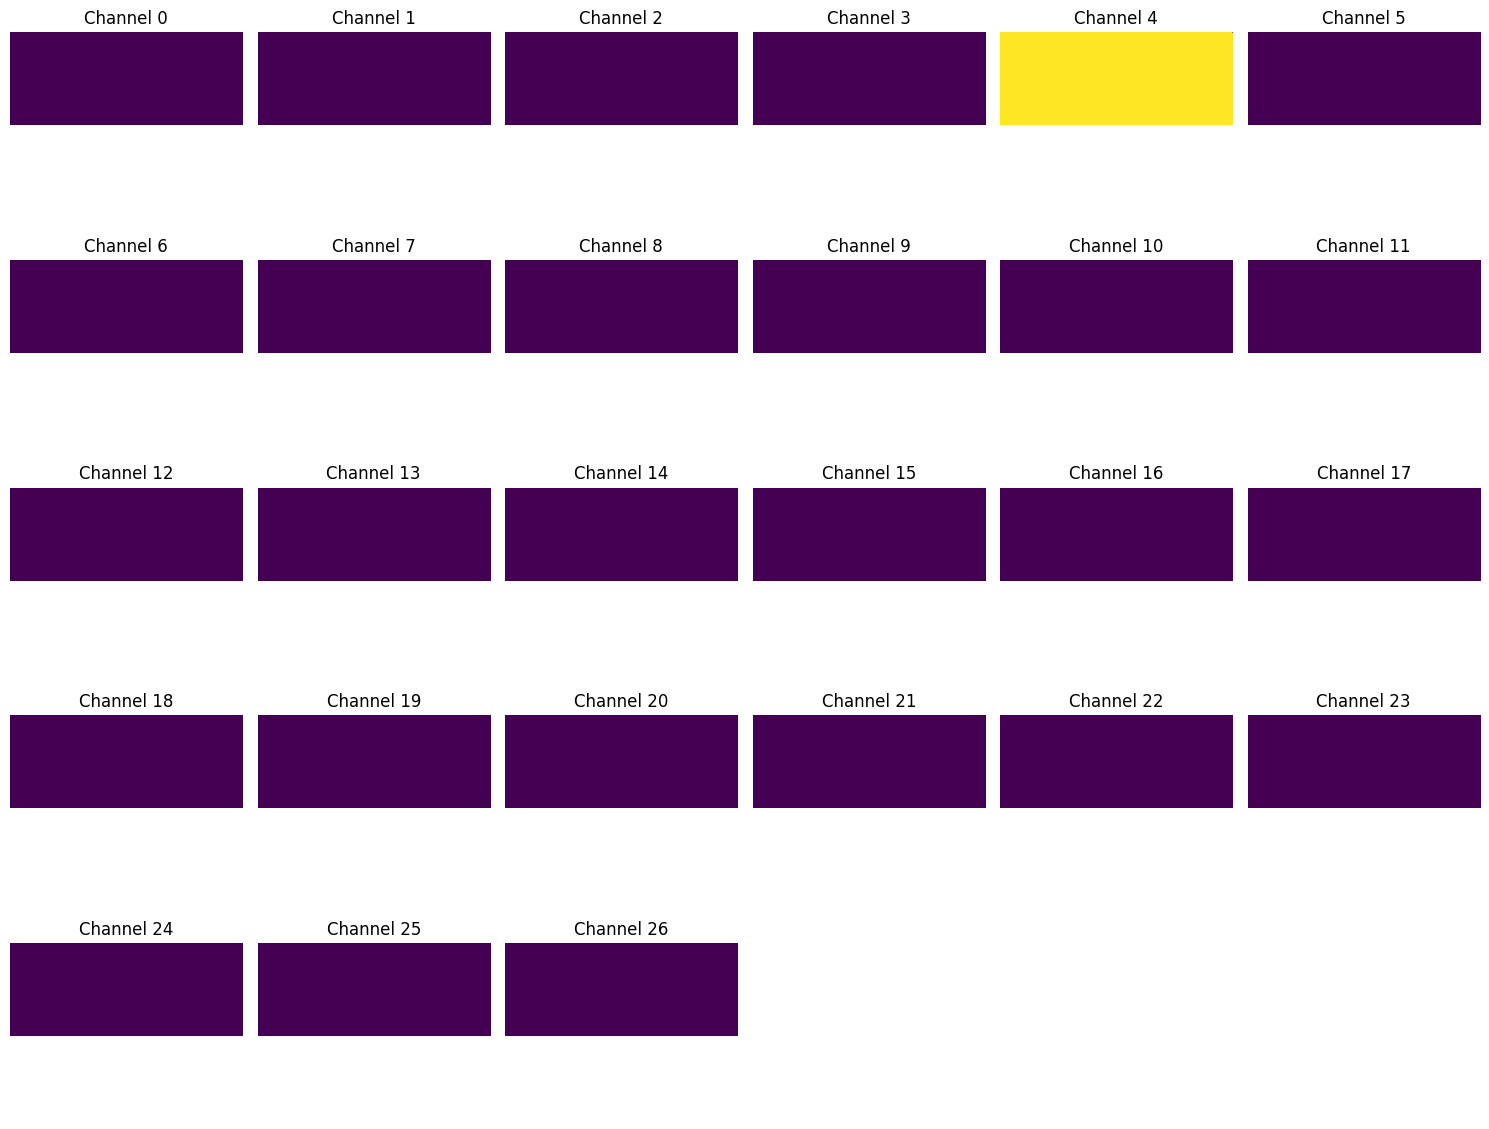

In [26]:
with torch.no_grad():
    output = model(img_tensor)  # Shape: [1, 27, H, W]
    probs = torch.sigmoid(output)  # Apply sigmoid to get probabilities
    output_np = output.squeeze(0).cpu().numpy()  # shape: (27, H, W)

fig, axes = plt.subplots(5, 6, figsize=(15, 12))
axes = axes.ravel()

for i in range(27):
    ax = axes[i]
    ax.imshow(output_np[i], cmap='viridis')
    ax.set_title(f"Channel {i}")
    ax.axis('off')

# Hide the last subplot if 5x6 = 30 and we have only 27
for j in range(27, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

